In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical
%matplotlib inline

Load the iris data (150 observations, 4 predictors, 3 classes)

In [2]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (150, 4)
y shape: (150,)


In [3]:
Y = to_categorical(y) # one-hot encode target labels
print(f'Y shape: {Y.shape}')


Y shape: (150, 3)


Load and inspect the pre-trained weights and biases. Compare their shapes to the NN diagram.

In [4]:
weights = np.load('data/weights.npy', allow_pickle=True)

w1 = weights[0] # weights for hidden (1st) layer
b1 = weights[1] # biases for hidden (1st) layer
w2 = weights[2] # weights for output (2nd) layer
b2 = weights[3] #biases for output (2nd) layer

In [5]:
for arr, name in zip([w1,b1,w2,b2], ['w1','b1','w2','b2']):
    print(f'{name} - shape: {arr.shape}')
    print(arr)
    print()

w1 - shape: (4, 3)
[[-0.42714605 -0.72814226  0.37730372]
 [ 0.39002347 -0.73936987  0.7850246 ]
 [ 0.12336338 -0.7267647  -0.48210236]
 [ 0.20957732 -0.7505736  -1.3789996 ]]

b1 - shape: (3,)
[0.         0.         0.31270522]

w2 - shape: (3, 3)
[[ 0.7043929   0.13273811 -0.845736  ]
 [-0.8318007  -0.6977086   0.75894   ]
 [ 1.1978723   0.14868832 -0.473792  ]]

b2 - shape: (3,)
[-1.2774311   0.45491916  0.73040146]



For the first affine transformation we need to multiple the augmented input by the first weight matrix (i.e., layer).

$$
\begin{bmatrix}
1 & X_{11} & X_{12} & X_{13} & X_{14}\\
1 & X_{21} & X_{22} & X_{23} & X_{24}\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n1} & X_{n2} & X_{n3} & X_{n4}\\
\end{bmatrix}
\begin{bmatrix}
b_{1}^1 & b_{2}^1 & b_{3}^1\\
W_{11}^1 & W_{12}^1 & W_{13}^1\\
W_{21}^1 & W_{22}^1 & W_{23}^1\\
W_{31}^1 & W_{32}^1 & W_{33}^1\\
W_{41}^1 & W_{42}^1 & W_{43}^1\\
\end{bmatrix}
=
\begin{bmatrix}
z_{11}^1 & z_{12}^1 & z_{13}^1\\
z_{21}^1 & z_{22}^1 & z_{23}^1\\
\vdots & \vdots & \vdots \\
z_{n1}^1 & z_{n2}^1 & z_{n3}^1\\
\end{bmatrix}
= \textbf{Z}^1
$$ 
<span style='color:gray'>About the notation: superscript refers to the layer and subscript refers to the index in the particular matrix. So $W_{23}^1$ is the weight in the 1st layer connecting the 2nd input to 3rd hidden node. Compare this matrix representation to the slide image. Also note the bias terms and ones that have been added to 'augment' certain matrices. You could consider $b_1^1$ to be $W_{01}^1$.</span><div></div>
<span style='color:blue'>1. Augment X with a column of ones to create `X_aug`</span><div></div><span style='color:blue'>2. Create the first layer weight matrix `W1` by horizontally stacking the bias vector `b1`on top of `w1` (consult `add_ones_col` for ideas. Don't forget your `Tab` and `Shift+Tab` tricks!)</span><div></div><span style='color:blue'>3. Do the matrix multiplication to find `Z1`</span>



In [6]:
def add_ones_col(X):
    '''Augment matrix with a column of ones'''
    X_aug = np.hstack((np.ones((X.shape[0],1)), X))
    return X_aug

In [7]:
# your code here
X_aug = add_ones_col(X)
W1 = np.vstack((weights[1], w1))
Z1 = np.matmul(X_aug, W1)

Next, we use our non-linarity
$$
\textit{a}_{\text{relu}}(\textbf{Z}^1)
=
\begin{bmatrix}
h_{11} & h_{12} & h_{13}\\
h_{21} & h_{22} & h_{23}\\
\vdots & \vdots & \vdots \\
h_{n1} & h_{n2} & h_{n3}\\
\end{bmatrix}
= \textbf{H}
$$



<span style='color:blue'>1. Define the relu activation</span><div></div>
<span style='color:blue'>2. use `plot_activation_func` to confirm implementation</span><div></div>
<span style='color:blue'>3. Use relu on `Z1` to create `H`</span>

In [8]:
def relu(z: np.array) -> np.array:
    # your code here
    h = np.maximum(0,z)
    return h

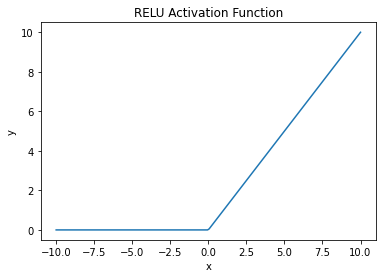

In [9]:
def plot_activation_func(f, name):
    lin_x = np.linspace(-10,10,200)
    h = f(lin_x)
    plt.plot(lin_x, h)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{name} Activation Function')

plot_activation_func(relu, name='RELU')

In [10]:
# your code here
H = relu(Z1)

The next step is very similar to the first

$$
\begin{bmatrix}
1 & h_{11} & h_{12} & h_{13}\\
1 & h_{21} & h_{22} & h_{23}\\
\vdots & \vdots & \vdots & \vdots \\
1 & h_{n1} & h_{n2} & h_{n3}\\
\end{bmatrix}
\begin{bmatrix}
b_{1}^2 & b_{2}^2 & b_{3}^2\\
W_{11}^2 & W_{12}^2 & W_{13}^2\\
W_{21}^2 & W_{22}^2 & W_{23}^2\\
W_{31}^2 & W_{32}^2 & W_{33}^2\\
\end{bmatrix}
=
\begin{bmatrix}
z_{11}^2 & z_{12}^2 & z_{13}^2\\
z_{21}^2 & z_{22}^2 & z_{23}^2\\
\vdots & \vdots & \vdots \\
z_{n1}^2 & z_{n2}^2 & z_{n3}^2\\
\end{bmatrix}
= \textbf{Z}^2
$$


<span style='color:blue'>1. Augment `H` with ones to create `H_aug`</span><div></div>
<span style='color:blue'>2. Combine `w2` and `b2` to create the output weight matric `W2`</span><div></div>
<span style='color:blue'>3. Perform the matrix multiplication to produce `Z2`</span><div></div>

In [11]:
# your code here
H_aug = add_ones_col(H)
W2 = np.vstack((b2,w2))
Z2 = np.matmul(H_aug, W2)


Finally we use the softmax activation on `Z2`. Now for each observation we have an output vector of length 3 which can be interpreted as a probability (they sum to 1).
$$
\textit{a}_{\text{softmax}}(\textbf{Z}^2)
=
\begin{bmatrix}
\hat{y}_{11} & \hat{y}_{12} & \hat{y}_{13}\\
\hat{y}_{21} & \hat{y}_{22} & \hat{y}_{23}\\
\vdots & \vdots & \vdots \\
\hat{y}_{n1} & \hat{y}_{n2} & \hat{y}_{n3}\\
\end{bmatrix}
= \hat{\textbf{Y}}
$$

<span style='color:blue'>1. Define softmax</span><div></div>
<span style='color:blue'>2. Use `softmax` on `Z2` to create `Y_hat`</span><div></div>

In [12]:
def softmax(z: np.array) -> np.array:
    '''
    Input: z - 2D numpy array of logits 
           rows are observations, classes are columns 
    Returns: y_hat - 2D numpy array of probabilities
             rows are observations, classes are columns 
    '''
    # hint: be careful which axis you sum over, and set keepdims=True
    # your code here
    
    y_hat = np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)
    return y_hat

In [13]:
Y_hat = softmax(Z2)


<span style='color:blue'>Now let's see how accuract the model's predictions are! Use `np.argmax` to collapse the columns of `Y_hat` to create `y_hat`, a vector of class labels like the original `y` before one-hot encoding.</span><div></div>

In [14]:
### edTest(test_acc) ###
# your code here
y_hat = np.argmax(Y_hat, axis=1)
acc = sum(y == y_hat)/len(y)
print(f'accuracy: {acc:.2%}')

accuracy: 96.67%
